<a href="https://colab.research.google.com/github/jessie4242/ProyectoAprendizajeAutomatico_InsuficienciaCardiaca/blob/master/entrenamientoIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Entrenamiento de Datos para definir la Supervivencia de un Paciente con IC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
#hola

## División aleatoria del Dataset al 90%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

Datos = ['age','sex','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','time']
x = dataset[Datos]
y = dataset['DEATH_EVENT']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)
resultados=[] 

## Modelo de Regresión Logística

In [ ]:
reg_log = LogisticRegression()
reg_log.fit(x_train,y_train)
reg_log_pred = reg_log.predict(x_test)
reg_log_score = accuracy_score(y_test, reg_log_pred)
resultados.append(100*reg_log_score)


<Figure size 432x288 with 0 Axes>

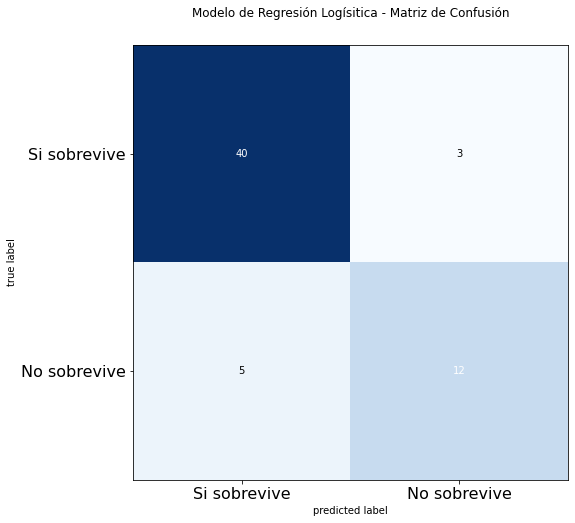

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, reg_log_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo de Regresión Logísitica - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

## Modelo de KNN

In [ ]:
clas_KNN = KNeighborsClassifier()
clas_KNN.fit(x_train, y_train)
knn_pred = clas_KNN.predict(x_test)
knn_score = accuracy_score(y_test, knn_pred)
resultados.append(100*knn_score)

<Figure size 432x288 with 0 Axes>

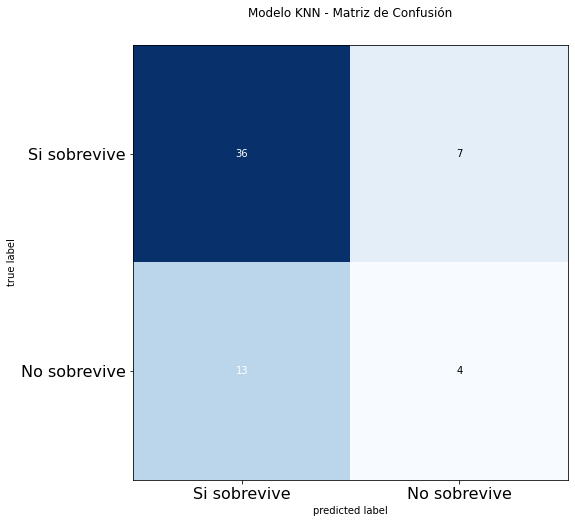

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo KNN - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

## Modelo de Árboles de Decisión

In [ ]:
arbol_des = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
arbol_des.fit(x_train, y_train)
arbol_pred = arbol_des.predict(x_test)
arbol_score = accuracy_score(y_test, arbol_pred)
resultados.append(100*arbol_score)

<Figure size 432x288 with 0 Axes>

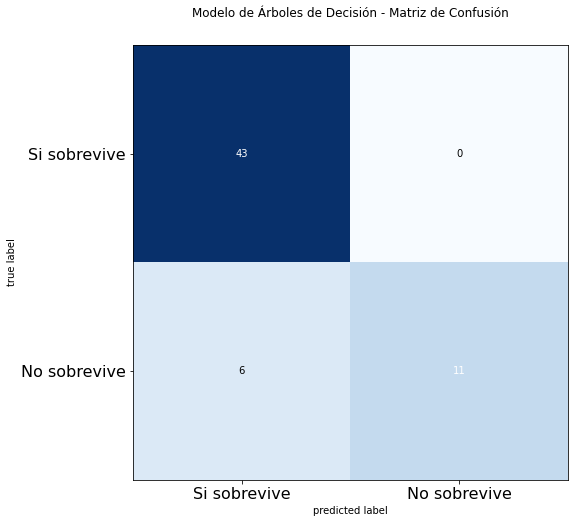

In [ ]:
cm = confusion_matrix(y_test, arbol_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo de Árboles de Decisión - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

## Soporte de Maquina Vectorial SVM

In [ ]:
svm_des = SVC()
svm_des.fit(x_train, y_train)
svm_pred = svm_des.predict(x_test)
svm_score = accuracy_score(y_test, svm_pred)
resultados.append(100* svm_score)

<Figure size 432x288 with 0 Axes>

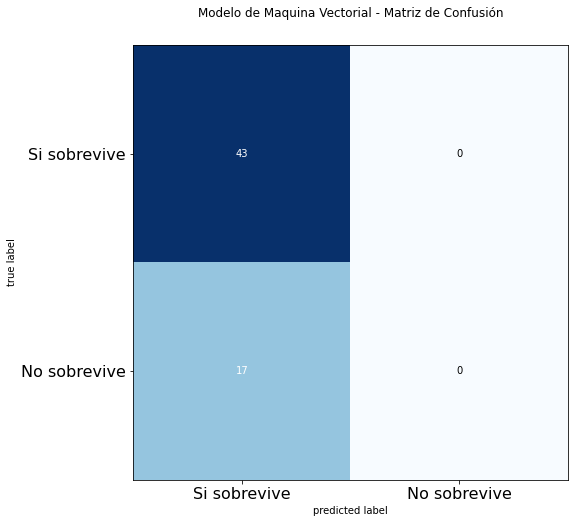

In [ ]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Modelo de Maquina Vectorial - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

## Random Forest

In [ ]:
randForest = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
randForest.fit(x_train, y_train)
randForest_pred = randForest.predict(x_test)
randForest_score = accuracy_score(y_test, randForest_pred)
resultados.append(100*randForest_score)

<Figure size 432x288 with 0 Axes>

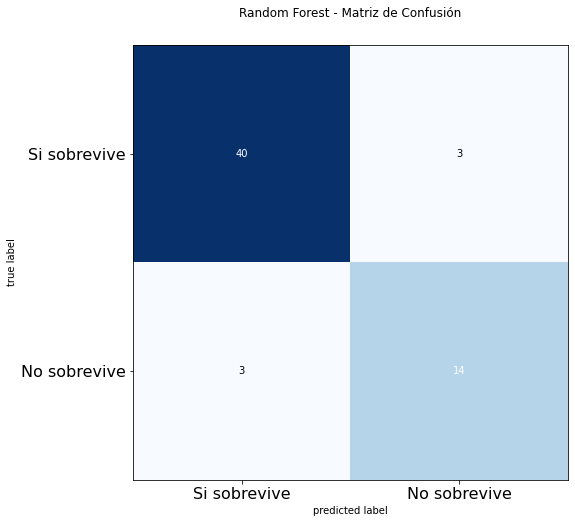

In [ ]:
cm = confusion_matrix(y_test, randForest_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest - Matriz de Confusión")
plt.xticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.yticks(range(2), ["Si sobrevive","No sobrevive"], fontsize=16)
plt.show() 

## Evaluación de exactitud de los modelos

In [ ]:
import plotly.graph_objects as go
modelos= ['Regresión Lineal', 'KNN','Arboles de Decisión', 'SVM', 'RandomForest']

fig = go.Figure([go.Bar(x=modelos, y=[reg_log_score,knn_score,arbol_score,svm_score,randForest_score],)])
fig.update_layout(title_text="Porcentaje de Exactitud de cada modelo")
fig.show()

In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = reg_log_pred[idx]
print(evento)

[1]


In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = knn_pred[idx]
print(evento)

[1]


In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = arbol_pred[idx]
print(evento)

[1]


In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = svm_pred[idx]
print(evento)

[0]


In [ ]:
idx = np.where((x_test['age']==94) & (x_test['creatinine_phosphokinase']==582) & (x_test['ejection_fraction']==38))
evento = randForest_pred[idx]
print(evento)

[1]


In [ ]:
import pickle
# save the model to disk
filename = 'modeloIC.sav'
pickle.dump(arbol_des, open(filename, 'wb'))